<a href="https://colab.research.google.com/github/ashok-lamichhane/User-Spending-Prediction-Project-using-RNNs/blob/main/User_Spending_Prediction_Project_using_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importing required libraries
# These include TensorFlow/Keras for models and matplotlib for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, GRU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Loading the dataset
# We fetch the dataset from Google Drive and load it as a pandas DataFrame
url = 'https://drive.google.com/uc?id=1I1_-aNqZNjgDtYIHDtUCRl9Rj_PLksox'
df = pd.read_csv(url)
df.head()


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


Data Preprocessing & Cleaning

In [15]:

# Print column names to inspect actual labels
print("Column names:\n", df.columns.tolist())

# 🧼 Strip spaces from all column names
df.columns = df.columns.str.strip()

# 🗓️ Convert the actual 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='mixed')

# Drop rows where 'Date' or 'Amount' is missing
df = df.dropna(subset=['Date', 'Amount'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Extract 'Amount' values and normalize
data = df[['Amount']].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


Column names:
 ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [16]:
# 🧩 Create sequences for time-series modeling
# We create X (past values) and y (future value) for model input
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(data_scaled, time_steps)


In [18]:
# 📊 Split into training and testing sets
# 80% for training and 20% for testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Training Bi-LSTM

In [20]:
# 🧠 Build and train Bi-LSTM model
# A Bidirectional LSTM captures patterns in both directions in time
model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(time_steps, 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Bidirectional(LSTM(32)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32,
                               validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 529s 69ms/step - loss: 0.0849 - val_loss: 0.0836
Epoch 2/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 519s 63ms/step - loss: 0.0835 - val_loss: 0.0830
Epoch 3/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 502s 63ms/step - loss: 0.0834 - val_loss: 0.0830
Epoch 4/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 484s 64ms/step - loss: 0.0835 - val_loss: 0.0829
Epoch 5/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 485s 62ms/step - loss: 0.0834 - val_loss: 0.0830


# Training Bi-GRU

In [21]:
# Building and training Bi-GRU model
# Similar to Bi-LSTM but uses Gated Recurrent Units which are simpler and faster
model_gru = Sequential()
model_gru.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(time_steps, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(Bidirectional(GRU(32)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

history_gru = model_gru.fit(X_train, y_train, epochs=5, batch_size=32,
                            validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 597s 78ms/step - loss: 0.0850 - val_loss: 0.0834
Epoch 2/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 627s 79ms/step - loss: 0.0833 - val_loss: 0.0831
Epoch 3/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 590s 78ms/step - loss: 0.0835 - val_loss: 0.0835
Epoch 4/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 621s 78ms/step - loss: 0.0837 - val_loss: 0.0832
Epoch 5/5
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 575s 76ms/step - loss: 0.0835 - val_loss: 0.0830


In [22]:
# Making predictions
# Predict and inverse transform the scaled values for both models
pred_lstm = model_lstm.predict(X_test)
pred_gru = model_gru.predict(X_test)

pred_lstm = scaler.inverse_transform(pred_lstm)
pred_gru = scaler.inverse_transform(pred_gru)
y_test_true = scaler.inverse_transform(y_test)


1883/1883 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step


In [23]:
# Evaluating model performance
# Compute RMSE for both models to compare their accuracy
rmse_lstm = np.sqrt(mean_squared_error(y_test_true, pred_lstm))
rmse_gru = np.sqrt(mean_squared_error(y_test_true, pred_gru))

print(f'Bi-LSTM RMSE: {rmse_lstm:.4f}')
print(f'Bi-GRU  RMSE: {rmse_gru:.4f}')


Bi-LSTM RMSE: 141.1471
Bi-GRU  RMSE: 141.1540


1883/1883 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step
1883/1883 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step
Evaluation Metrics for Bi-LSTM
Accuracy : 0.5030952815627437
Precision: 0.5030952815627437
Recall   : 1.0
F1 Score : 0.669412362255151
----------------------------------------
Evaluation Metrics for Bi-GRU
Accuracy : 0.5030952815627437
Precision: 0.5030952815627437
Recall   : 1.0
F1 Score : 0.669412362255151
----------------------------------------


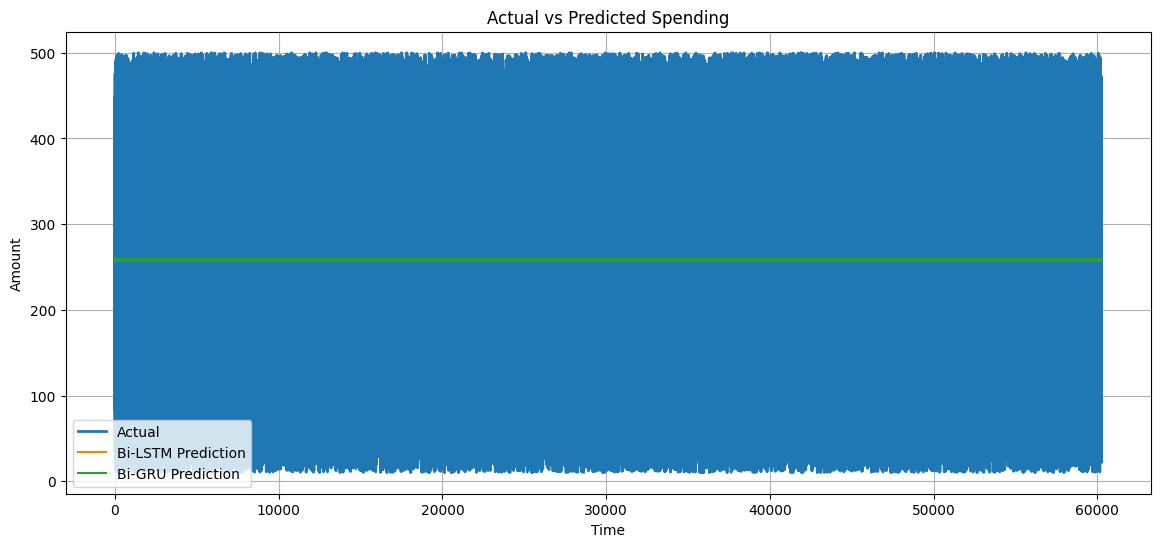

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

pred_lstm = model_lstm.predict(X_test)
pred_gru = model_gru.predict(X_test)

# Thresholding: convert to binary (for classification metrics)
threshold = 0.5
y_test_bin = (y_test > threshold).astype(int)
pred_lstm_bin = (pred_lstm > threshold).astype(int)
pred_gru_bin = (pred_gru > threshold).astype(int)

# Evaluation Function
def evaluate_model(y_true, y_pred, name="Model"):
    print(f"Evaluation Metrics for {name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
    print("F1 Score :", f1_score(y_true, y_pred, zero_division=0))
    print("-" * 40)

# valuate both models
evaluate_model(y_test_bin, pred_lstm_bin, "Bi-LSTM")
evaluate_model(y_test_bin, pred_gru_bin, "Bi-GRU")

# Plot predicted vs actual
plt.figure(figsize=(14, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual', linewidth=2)
plt.plot(scaler.inverse_transform(pred_lstm), label='Bi-LSTM Prediction')
plt.plot(scaler.inverse_transform(pred_gru), label='Bi-GRU Prediction')
plt.legend()
plt.title("Actual vs Predicted Spending")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.grid(True)
plt.show()